# Hands-on Pandas

⏱️ 40 min.

Pandas is a a powerfull and whitely used tool for data analysis and manipulation.

Mito will later generate pandas code for us, so having an understanding the fundamentals of pandas will help us to better understand mito later.

In the last part of today's session, we will learn about dataframes, series, and some basic analysis tools that we can access here.

In the end, we will also have a short glimps on mito.


## Dataframes and Series


First, we import pandas and numpy ( numpy was the package for powerful arrays)


In [ ]:
import pandas as pd
import numpy as np

💡 **Series** and **DataFrame** two most important data structures in pandas.

A Pandas **Series** is a one-dimensional labeled array, like a column in an excel sheet.  

A Pandas **DataFrame** is a two-dimensional table made up of several Series, just like a spreadsheet.

Both have an **index**  that serves as a unique identifier for each row.

In [ ]:
pd.Series([1, 3, 5, 6])

In [ ]:
pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=list("ABC"))

🧑‍💻 Store the above dataframe in a variable called df and print it.

Let's first get started with **dataframes**  
Let's append a new rope to the dataframe!

In [ ]:
original_df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns=list("ABC"))
new_row = pd.DataFrame([[0, 0, 0]], columns=list("ABC"))
df = pd.concat([original_df, new_row], ignore_index=True)
df

🧑‍💻 But why only one new row? Now add 2 more rows of zeros in the above exmple.

🧑‍💻 Now, add a new column by running `df['D'] = 1` in the cell below

🧑‍💻 Deleting columns is possible as well! Run the below cells

In [ ]:
original_df.drop('B', axis=1)

In [ ]:
original_df

Well, what happend here? Why is B still in the original_df?  
That's the case because the method `drop` **returns** the new dataframe.  
It does not replace the original one.

🧑‍💻 Go to the above cell and assign orginial dataframe to the return value by typing `original_df = original_df.drop('B', axis=1)`.  
You can also give the new variable another name, that way you won't loose your original dataframe.

Note that there's also `original_df.drop('B', axis=1 , inplace=True))` to direcly replace the dataframe, but that's not considered best practice.

Great, but let's increase the values!

💡 You can multiply a dataframe using the `apply` function.  
🧑‍💻 What do you think will happen when you run the below code 10 times?

In [ ]:
df["A"] = df['A'].apply(lambda x: x**2)
df

## Import data

It's nice that we can initiate a dataframe from a list, but for real life appications, we will generate the dataframe from other formats. 
 
💡 pandas supports a **lot of formats** to be converted to a dataframe. Here are some examples using numpy, dicts, and comma seperated values.

In [ ]:
pd.DataFrame(np.random.uniform(low=10, high=20, size=(6, 4)), columns=list("ABCD"))

In [ ]:
d = {"sand": "tiny grains", "shell": "sea creature home", "wave": "ocean's rhythm"}
pd.DataFrame(data = [d])

In [ ]:
# we can also change the orientation of the dataframe like this
pd.DataFrame.from_dict(d, orient="index", columns=["definition"])

💡 Next we will **load data from a csv** file.   
We will find a dataset set, which investigates the septal and spal size of three iris flowers species.  
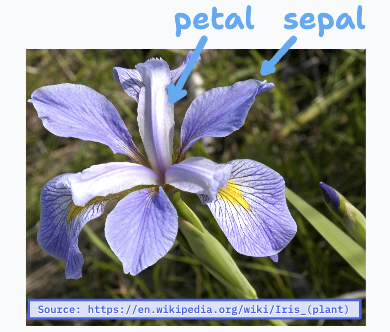

In [ ]:
df = pd.read_csv('data1_iris.csv', index_col=0)


In [ ]:
df

Let's start with the data exploration!  
💡 `df` is now an python object. These objects contain data, but also methods that can be called. E.g. `df.head()` will show the head of a dataframe.   
🧑‍💻 Run the below cell. Then change `head` to `tail` to print the tail instead.

In [ ]:
df.head()

💡 There are many other useful comments like `df.info()` , `df.max()` , `df.describe()`.  
🧑‍💻 Run all of  the below cell and figure out what they are good for by reading carefully what is shown in the output.  
Please don't memorize all the methods, this is just a practic for you to get more familiar with them.

In [ ]:
# Summary of the dataframe
df.info()

In [ ]:
# Display descriptive statistics
df.describe()

In [ ]:
# Display the count of each species
df['Species'].value_counts()

In [ ]:
# Display the mean sepal and petal width and length of each species
df.groupby('Species').mean()

In [ ]:
# Display the number of missing values in each column
print(df.isnull().sum())

In [ ]:
# Drop the 'Species' column
df_dropped = df.drop('Species', axis=1)
df_dropped.head()

In [ ]:
df_renamed = df.rename(columns={'Species': 'iris_species'})
df_renamed.head()

In [ ]:
# Use loc to select all rows and the 'species' column
df.loc[:, 'Species']

In [ ]:
# Use iloc to select the first 10 rows and the first 3 columns (integer-based)
df.iloc[0:10, 0:3]

🧑‍💻 Now are you're a scientist who found 5 more flowers in the laboratory.  
You wrote them into the dict and made a new dataframe out of it.  
So, now run the below two cells.

In [ ]:
new_data = {
    'Id': ["new1", "new2", "new3", "new4", "new5"],
    'SepalLengthCm': [5.6, 5.7, 5.1, 5.0, 5.2],
    'SepalWidthCm': [3.0, 3.2, 3.4, 3.1, 3.5],
    'PetalLengthCm': [4.5, 4.2, 4.7, 4.1, 4.3],
    'PetalWidthCm': [1.5, 1.3, 1.6, 1.2, 1.4],
    'Species': ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica']
}

new_df = pd.DataFrame(new_data)
new_df = new_df.set_index('Id')
new_df

🧑‍💻 Now, append the new data to the original dataframe using `pd.concat([df1, df2])`   
Store the result in a new variable called `df_extended` and print it. Be aware of the square brackets [].

In [ ]:
new_df = pd.concat([df, new_df])  # TODO - remove this line before the workshop
new_df  # TODO - remove this line before the workshop